In [1]:
import numpy as np
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='once', category=UserWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import json
from pathlib import Path

In [2]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 1000)

In [4]:
algs = ['zip_safe', 'scalar', 'u64_xor', 'u64_eq', 'u64_eq_if0', 'u64_eq_if1', 's256_xor', 's256_eq', 'p_u64_once','p_u32_once','p_u16_once', 'edk', 'u64_then_s256']
def read_results():
    # Run `just json` to create this file.
    json_path = Path('results/bench.json')
    data = json.loads(json_path.read_text())
    df = pd.json_normalize(data, sep='_')
    
    df = df.rename({'mean': 'time'}, axis='columns')
    
    # Computed columns
    df['e'] = df.apply(lambda row: float(row['id'].split('/')[0]), axis=1)
    df['alg'] = df.apply(lambda row: row['id'].split('/')[1], axis=1)
    df = df.drop('id', axis=1)
    df['alg_idx'] = df.apply(lambda row: algs.index(row['alg']), axis=1)
    df.sort_values(by='alg_idx')
   
    return df

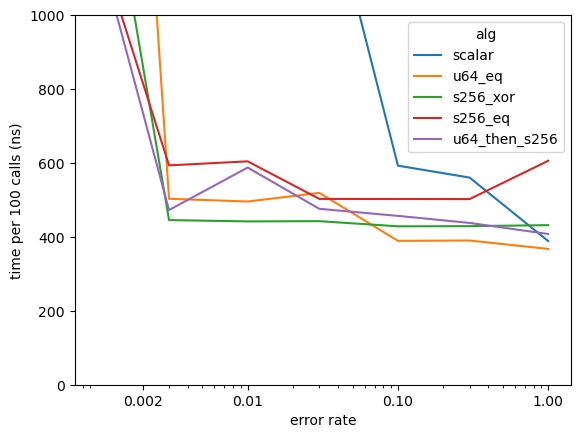

In [7]:
df = read_results()
p = df.pivot_table(columns='alg', index='e', values='time', sort=False)
ax = p.plot(logx=True, ylim=(0,1000))
ax.set_xlabel('error rate')
ax.set_xticks([0.002, 0.01, 0.1, 1])
ax.set_xticklabels(['0.002', '0.01', '0.10', '1.00'])
ax.set_ylabel('time per 100 calls (ns)')
plt.savefig(f"plots/bench", dpi=300, bbox_inches='tight')
plt.show()